<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Import Libraries
</h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("ggplot")
sns.set_theme()


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Load Dataset
</h1>

In [ ]:
df = pd.read_csv("/kaggle/input/global-football-goalscorers-dataset/results.csv")
df_1 = pd.read_csv("/kaggle/input/global-football-goalscorers-dataset/goalscorers.csv")
df_2 = pd.read_csv("/kaggle/input/global-football-goalscorers-dataset/shootouts.csv")
df_3= pd.read_csv("/kaggle/input/global-football-goalscorers-dataset/former_names.csv")


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Dataset Overview
</h1>

In [ ]:
df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48673 non-null  object
 1   home_team   48673 non-null  object
 2   away_team   48673 non-null  object
 3   home_score  48673 non-null  int64 
 4   away_score  48673 non-null  int64 
 5   tournament  48673 non-null  object
 6   city        48673 non-null  object
 7   country     48673 non-null  object
 8   neutral     48673 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [ ]:
df.describe(include="all")


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
count,48673,48673,48673,48673.000000,48673.000000,48673,48673,48673,48673
unique,16357,325,318,NaN,NaN,188,2119,268,2
top,2012-02-29,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False
freq,66,608,579,NaN,NaN,18151,737,1464,35864
mean,NaN,NaN,NaN,1.757874,1.181743,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.772685,1.401651,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Convert Date Column
</h1>

In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 Create Feature Columns
</h1>

In [ ]:
df["total_goals"] = df["home_score"] + df["away_score"]
df["goal_diff"] = df["home_score"] - df["away_score"]

df["match_result"] = df["goal_diff"].apply(
    lambda x: "Home Win" if x>0 else ("Away Win" if x<0 else "Draw")
)


<h1 style="color: black; background-color: #ff99ff; text-align: center; padding: 12px; border-radius: 10px;">
 EDA & Visualizations
</h1>

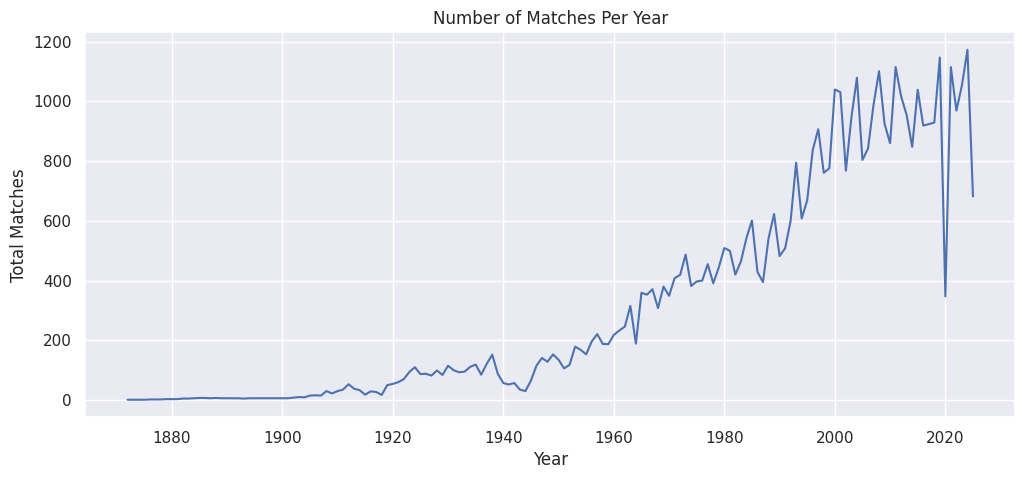

In [ ]:
matches_per_year = df.groupby("year").size()

plt.figure(figsize=(12,5))
plt.plot(matches_per_year)
plt.title("Number of Matches Per Year")
plt.xlabel("Year")
plt.ylabel("Total Matches")
plt.show()


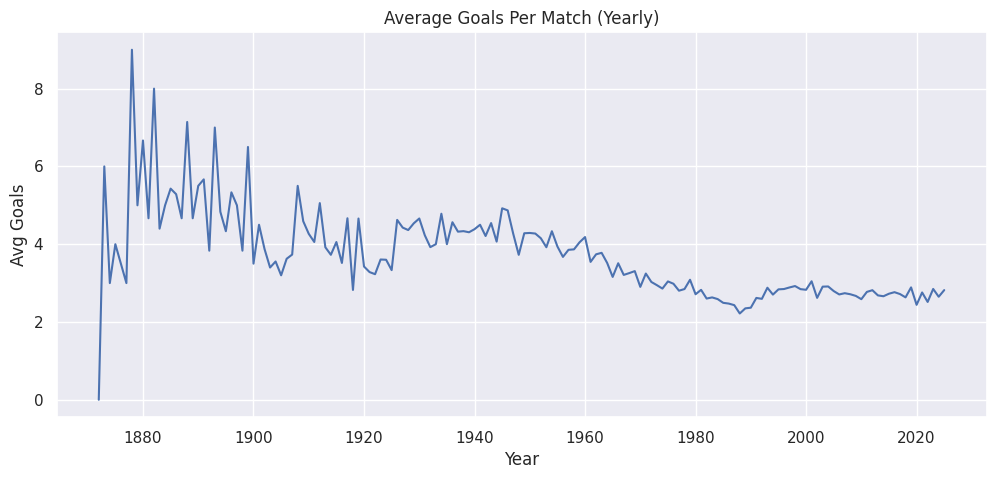

In [ ]:
avg_goals = df.groupby("year")["total_goals"].mean()

plt.figure(figsize=(12,5))
plt.plot(avg_goals)
plt.title("Average Goals Per Match (Yearly)")
plt.xlabel("Year")
plt.ylabel("Avg Goals")
plt.show()


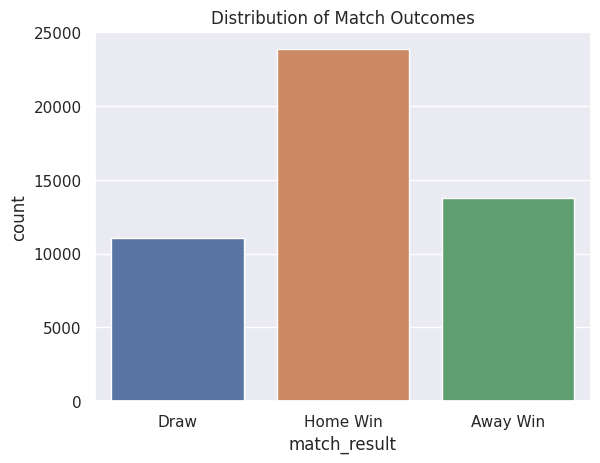

In [ ]:
sns.countplot(data=df, x="match_result")
plt.title("Distribution of Match Outcomes")
plt.show()


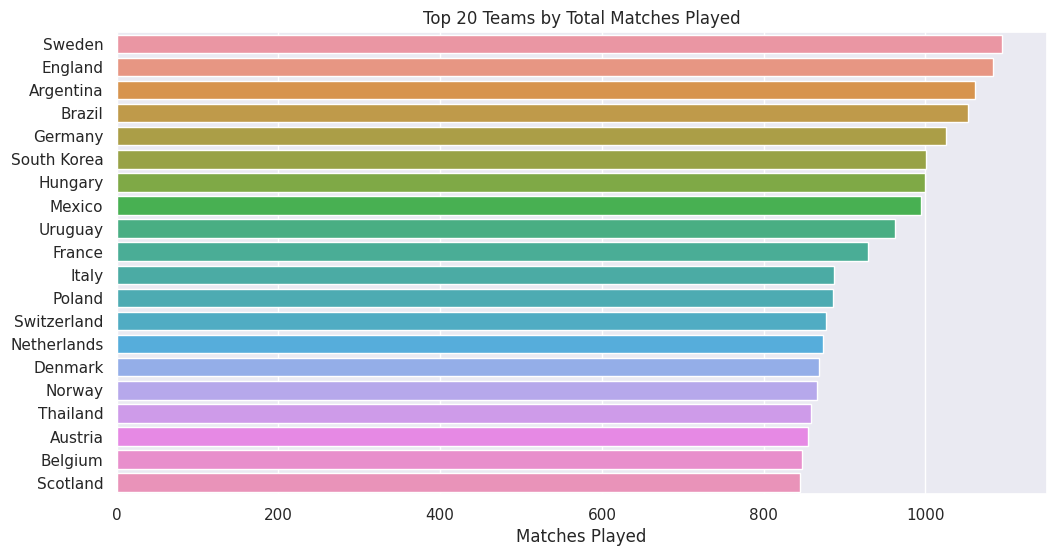

In [ ]:
home_counts = df["home_team"].value_counts()
away_counts = df["away_team"].value_counts()

team_matches = (home_counts + away_counts).sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=team_matches.values, y=team_matches.index)
plt.title("Top 20 Teams by Total Matches Played")
plt.xlabel("Matches Played")
plt.show()


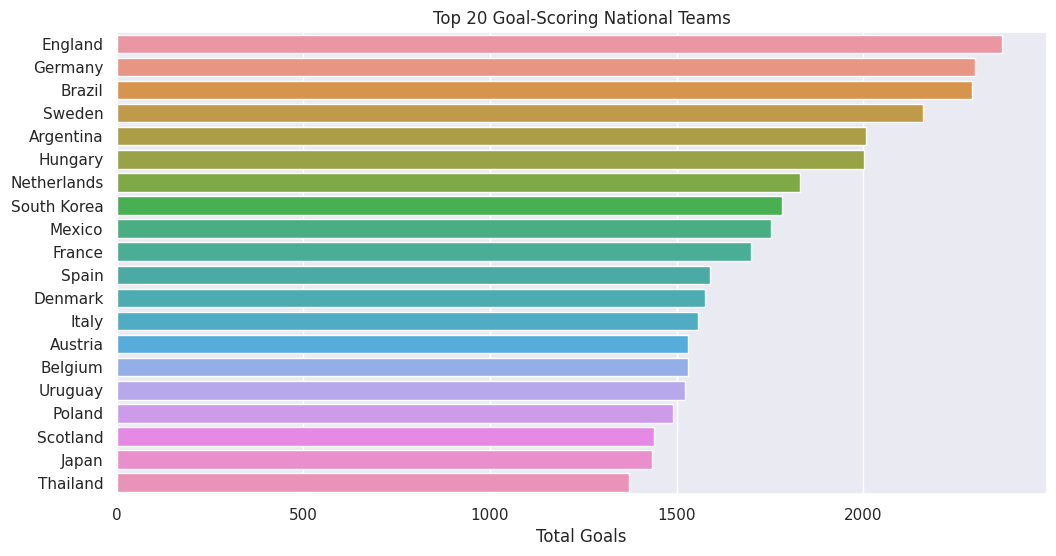

In [ ]:
home_goals = df.groupby("home_team")["home_score"].sum()
away_goals = df.groupby("away_team")["away_score"].sum()

total_goals = (home_goals + away_goals).sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=total_goals.values, y=total_goals.index)
plt.title("Top 20 Goal-Scoring National Teams")
plt.xlabel("Total Goals")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


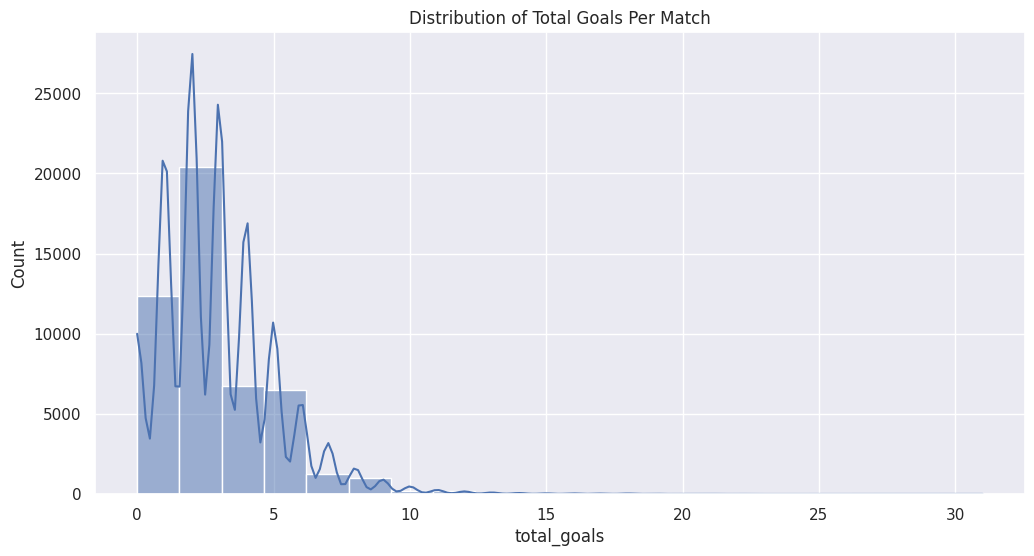

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df["total_goals"], bins=20, kde=True)
plt.title("Distribution of Total Goals Per Match")
plt.show()


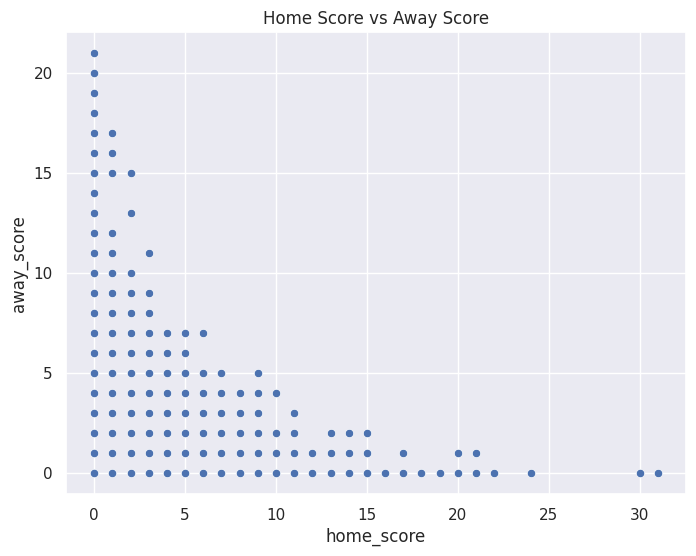

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="home_score", y="away_score")
plt.title("Home Score vs Away Score")
plt.show()


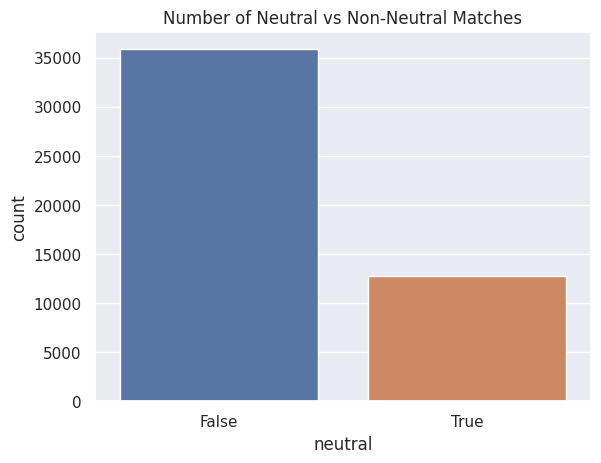

In [ ]:
sns.countplot(data=df, x="neutral")
plt.title("Number of Neutral vs Non-Neutral Matches")
plt.show()


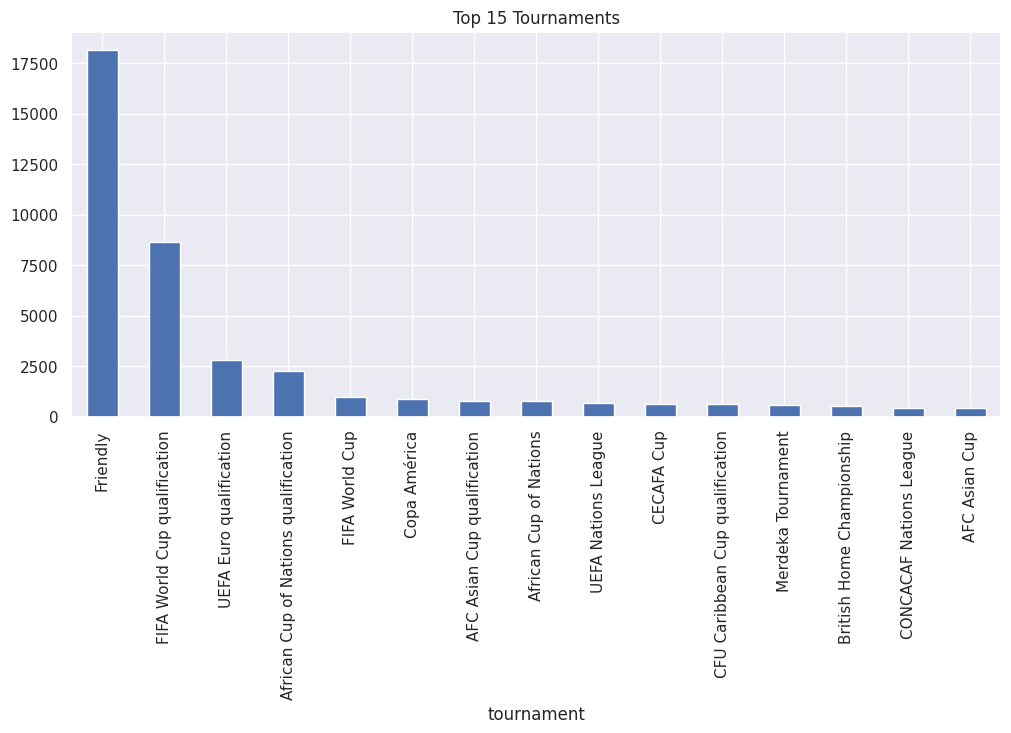

In [ ]:
df["tournament"].value_counts().head(15).plot(kind="bar", figsize=(12,5))
plt.title("Top 15 Tournaments")
plt.show()


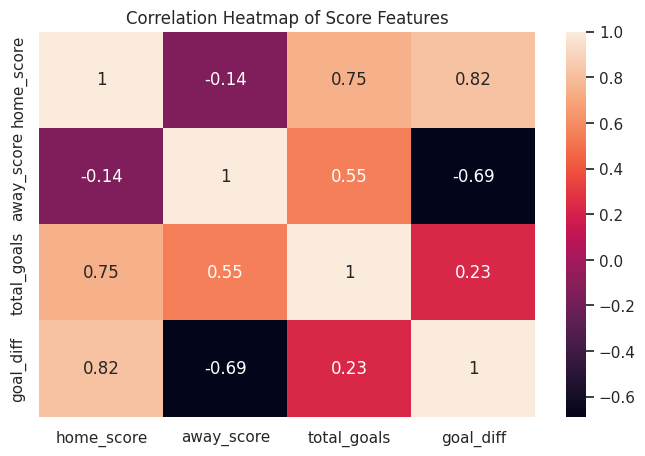

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["home_score","away_score","total_goals","goal_diff"]].corr(), annot=True)
plt.title("Correlation Heatmap of Score Features")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

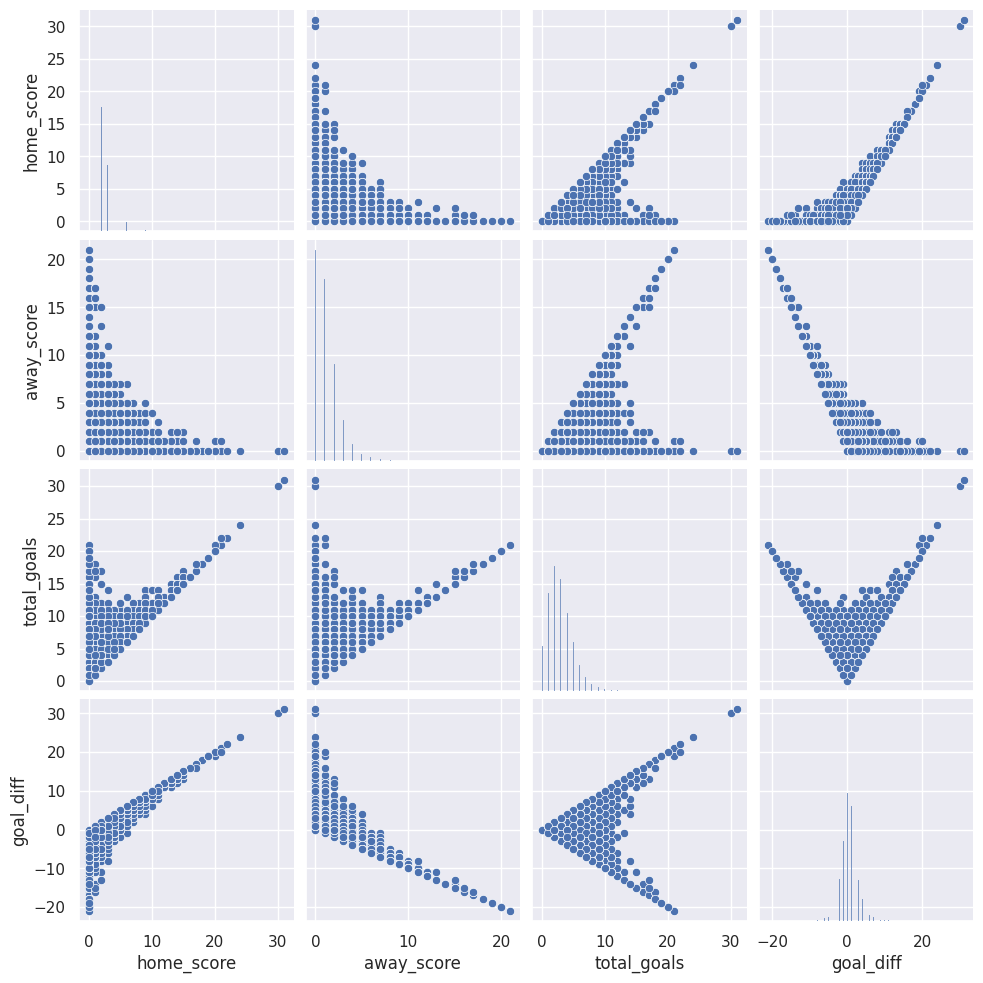

In [ ]:
sns.pairplot(df[["home_score","away_score","total_goals","goal_diff"]])
plt.show()


/tmp/ipykernel_20/1765489301.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["home_score"], shade=True, label="Home Score")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_20/1765489301.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["away_score"], shade=True, label="Away Score")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

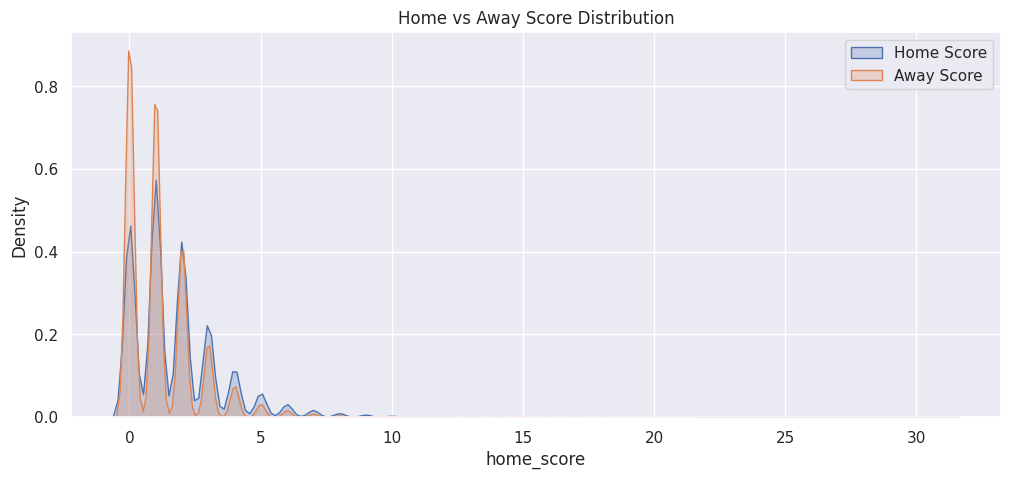

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(df["home_score"], shade=True, label="Home Score")
sns.kdeplot(df["away_score"], shade=True, label="Away Score")
plt.title("Home vs Away Score Distribution")
plt.legend()
plt.show()


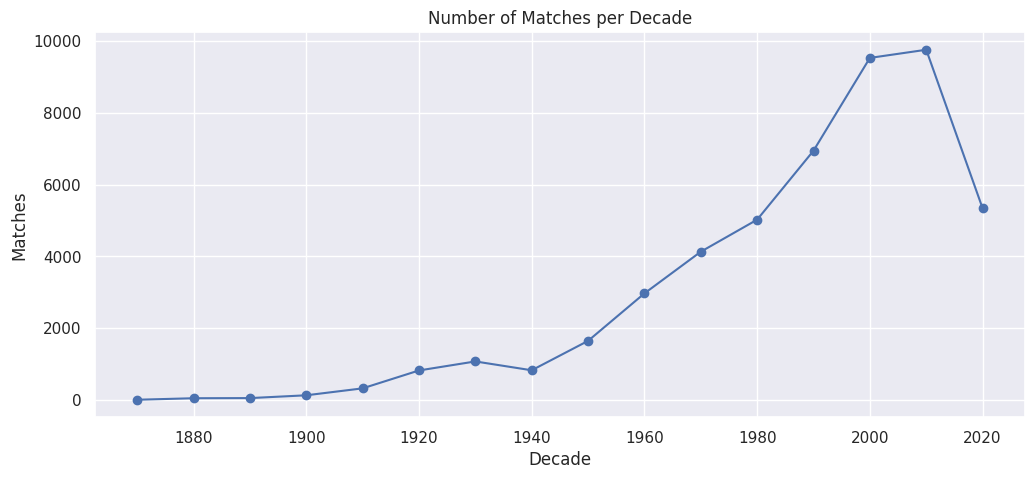

In [ ]:
df["decade"] = (df["year"] // 10) * 10

decade_matches = df.groupby("decade").size()

plt.figure(figsize=(12,5))
plt.plot(decade_matches, marker="o")
plt.title("Number of Matches per Decade")
plt.xlabel("Decade")
plt.ylabel("Matches")
plt.show()


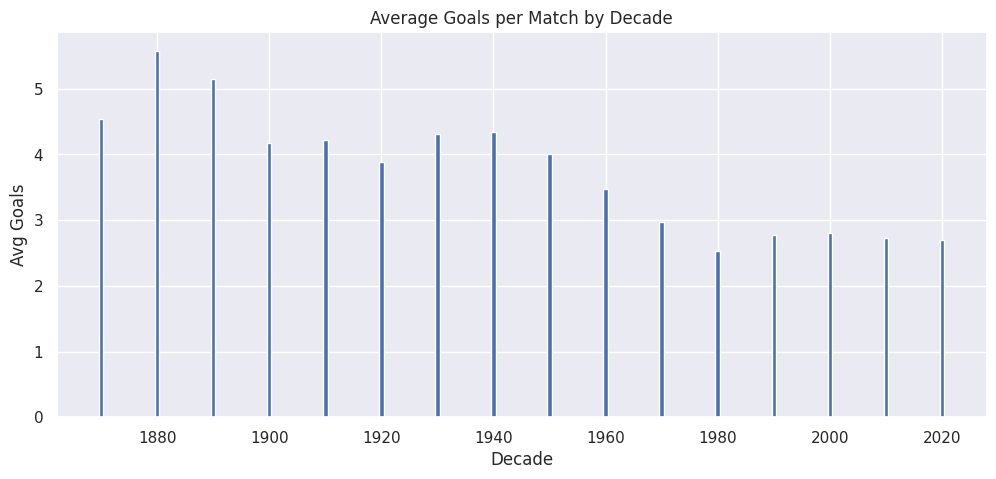

In [ ]:
decade_goals = df.groupby("decade")["total_goals"].mean()

plt.figure(figsize=(12,5))
plt.bar(decade_goals.index, decade_goals.values)
plt.title("Average Goals per Match by Decade")
plt.xlabel("Decade")
plt.ylabel("Avg Goals")
plt.show()


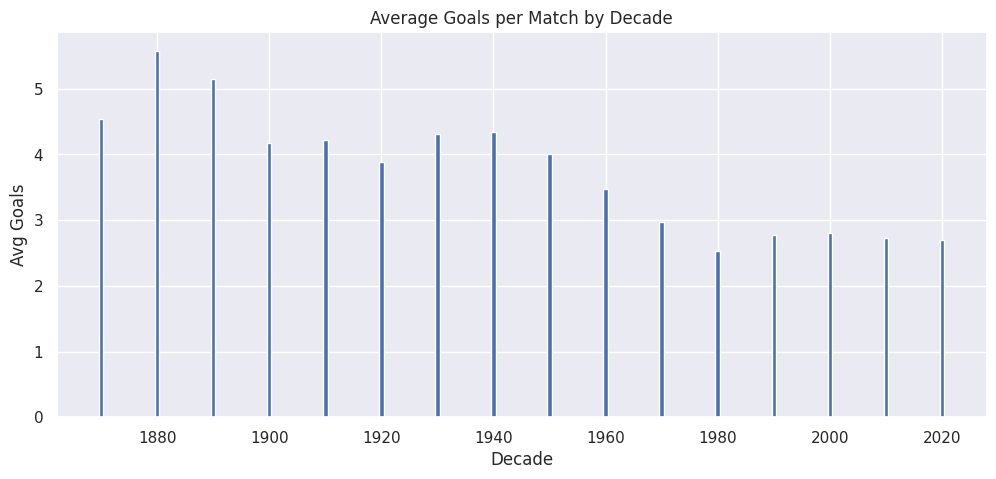

In [ ]:
decade_goals = df.groupby("decade")["total_goals"].mean()

plt.figure(figsize=(12,5))
plt.bar(decade_goals.index, decade_goals.values)
plt.title("Average Goals per Match by Decade")
plt.xlabel("Decade")
plt.ylabel("Avg Goals")
plt.show()


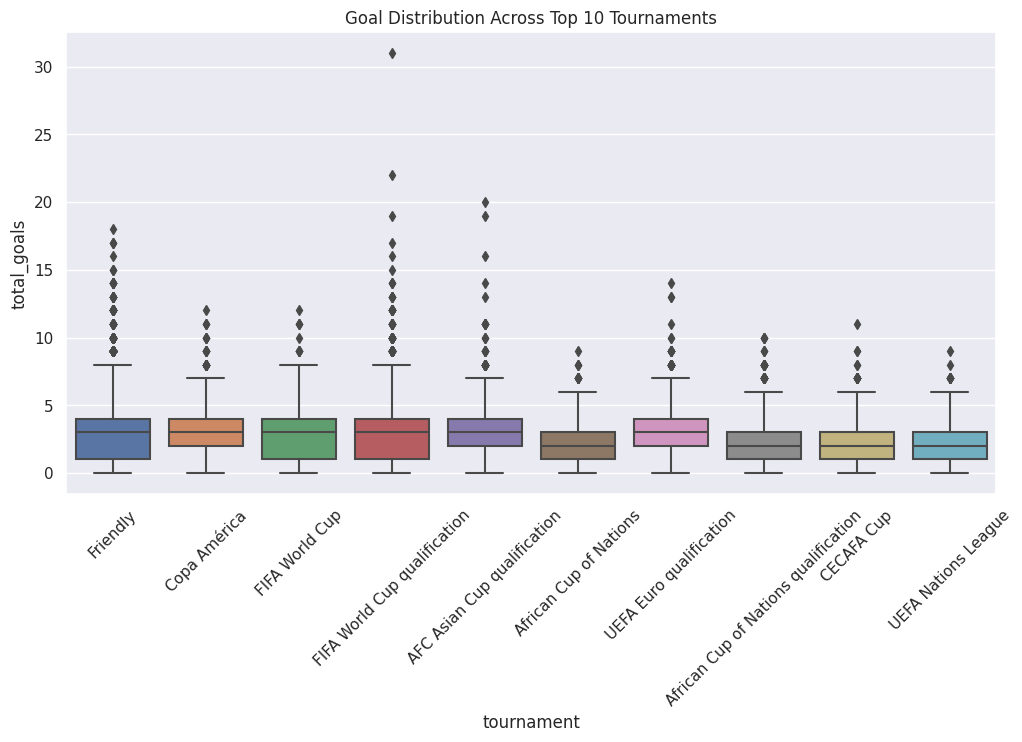

In [ ]:
top_tournaments = df["tournament"].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["tournament"].isin(top_tournaments)],
            x="tournament", y="total_goals")
plt.xticks(rotation=45)
plt.title("Goal Distribution Across Top 10 Tournaments")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


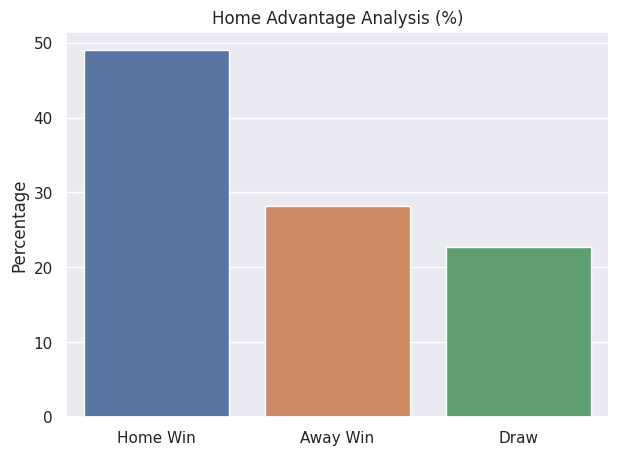

In [ ]:
home_win_rate = (df["match_result"] == "Home Win").mean() * 100
away_win_rate = (df["match_result"] == "Away Win").mean() * 100
draw_rate     = (df["match_result"] == "Draw").mean() * 100

plt.figure(figsize=(7,5))
sns.barplot(x=["Home Win","Away Win","Draw"],
            y=[home_win_rate,away_win_rate,draw_rate])
plt.title("Home Advantage Analysis (%)")
plt.ylabel("Percentage")
plt.show()


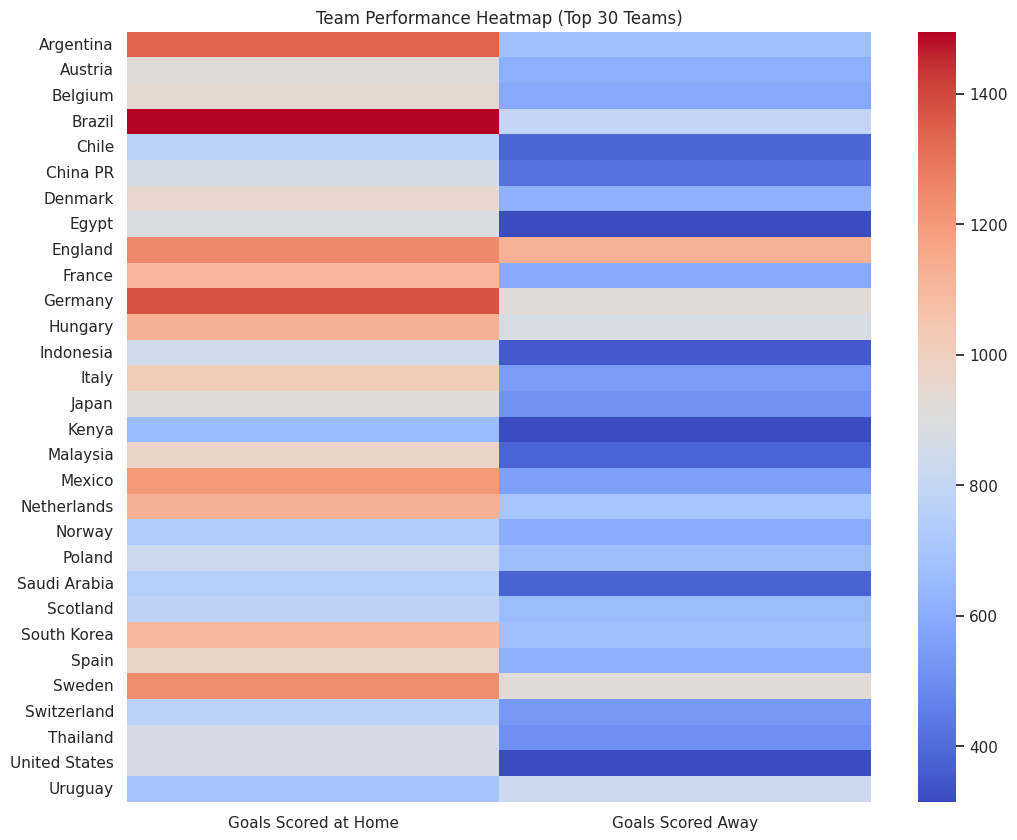

In [ ]:
top_teams = df["home_team"].value_counts().head(30).index

home_win = df[df["home_team"].isin(top_teams)].groupby("home_team")["home_score"].sum()
away_win = df[df["away_team"].isin(top_teams)].groupby("away_team")["away_score"].sum()

performance_df = pd.DataFrame({
    "Goals Scored at Home": home_win,
    "Goals Scored Away": away_win
})

plt.figure(figsize=(12,10))
sns.heatmap(performance_df, annot=False, cmap="coolwarm")
plt.title("Team Performance Heatmap (Top 30 Teams)")
plt.show()


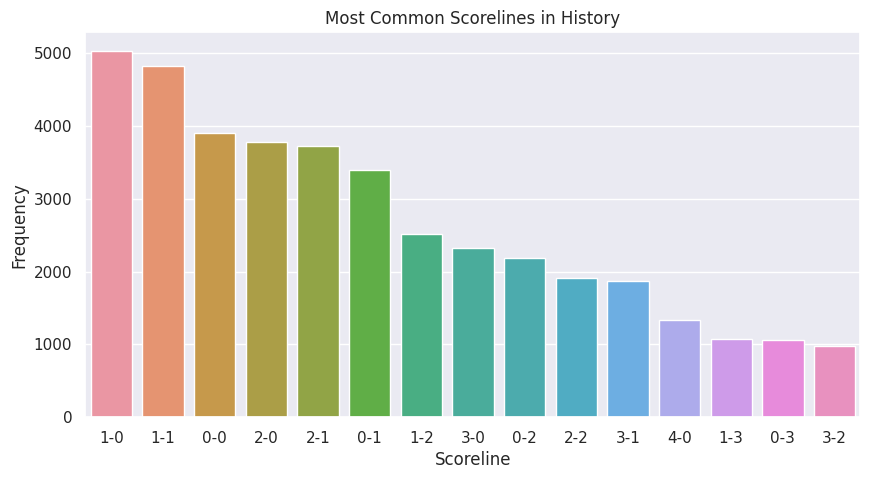

In [ ]:
df["scoreline"] = df["home_score"].astype(str) + "-" + df["away_score"].astype(str)
common_scores = df["scoreline"].value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=common_scores.index, y=common_scores.values)
plt.title("Most Common Scorelines in History")
plt.xlabel("Scoreline")
plt.ylabel("Frequency")
plt.show()


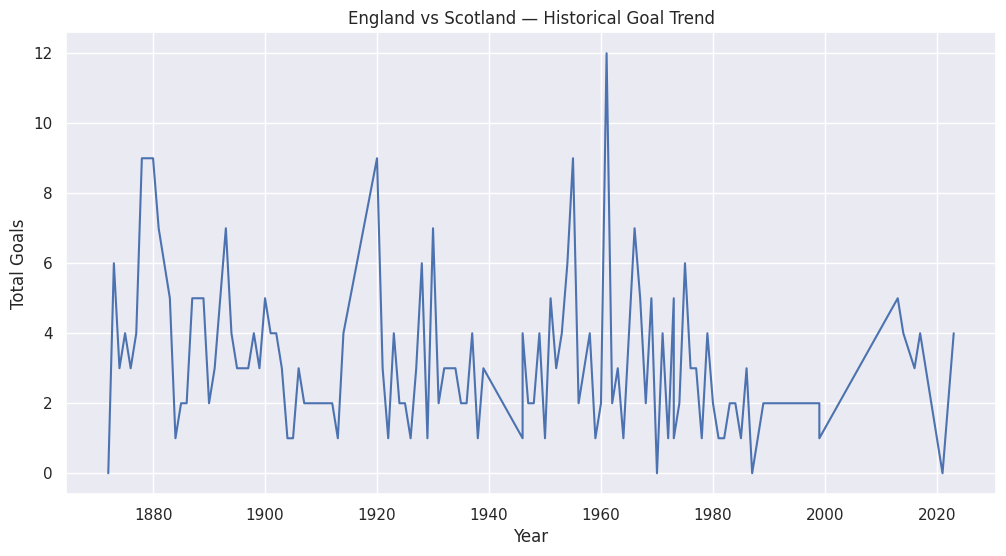

In [ ]:
mask = ((df["home_team"]=="England") & (df["away_team"]=="Scotland")) | \
       ((df["home_team"]=="Scotland") & (df["away_team"]=="England"))

rival = df[mask]

plt.figure(figsize=(12,6))
plt.plot(rival["year"], rival["total_goals"])
plt.title("England vs Scotland — Historical Goal Trend")
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.show()


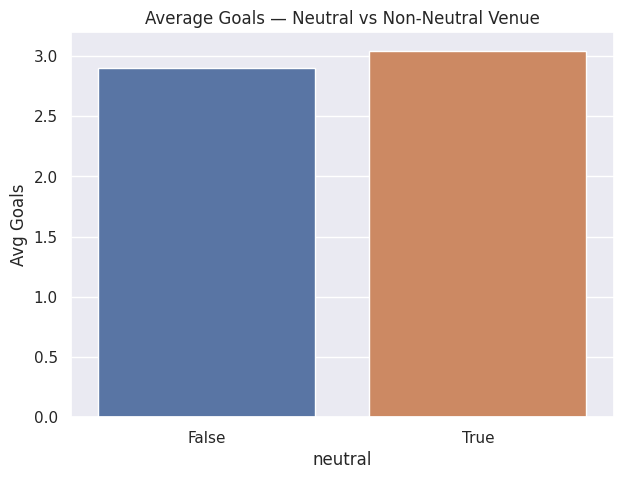

In [ ]:
neutral_goals = df.groupby("neutral")["total_goals"].mean()

plt.figure(figsize=(7,5))
sns.barplot(x=neutral_goals.index, y=neutral_goals.values)
plt.title("Average Goals — Neutral vs Non-Neutral Venue")
plt.ylabel("Avg Goals")
plt.show()


In [ ]:
upsets = df[(df["match_result"]=="Away Win") & (df["goal_diff"]<=-2)]
upsets.head(10)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,total_goals,goal_diff,match_result,decade,scoreline
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,4,-2,Away Win,1870,1-3
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,2,-2,Away Win,1870,0-2
12,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False,1879,3,-3,Away Win,1870,0-3
17,1881-03-12,England,Scotland,1,6,Friendly,London,England,False,1881,7,-5,Away Win,1880,1-6
18,1881-03-14,Wales,Scotland,1,5,Friendly,Wrexham,Wales,False,1881,6,-4,Away Win,1880,1-5
19,1882-02-18,Northern Ireland,England,0,13,Friendly,Belfast,Ireland,False,1882,13,-13,Away Win,1880,0-13
27,1883-03-12,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False,1883,3,-3,Away Win,1880,0-3
29,1884-01-26,Northern Ireland,Scotland,0,5,British Home Championship,Belfast,Ireland,False,1884,5,-5,Away Win,1880,0-5
31,1884-02-23,Northern Ireland,England,1,8,British Home Championship,Belfast,Ireland,False,1884,9,-7,Away Win,1880,1-8
33,1884-03-17,Wales,England,0,4,British Home Championship,Wrexham,Wales,False,1884,4,-4,Away Win,1880,0-4


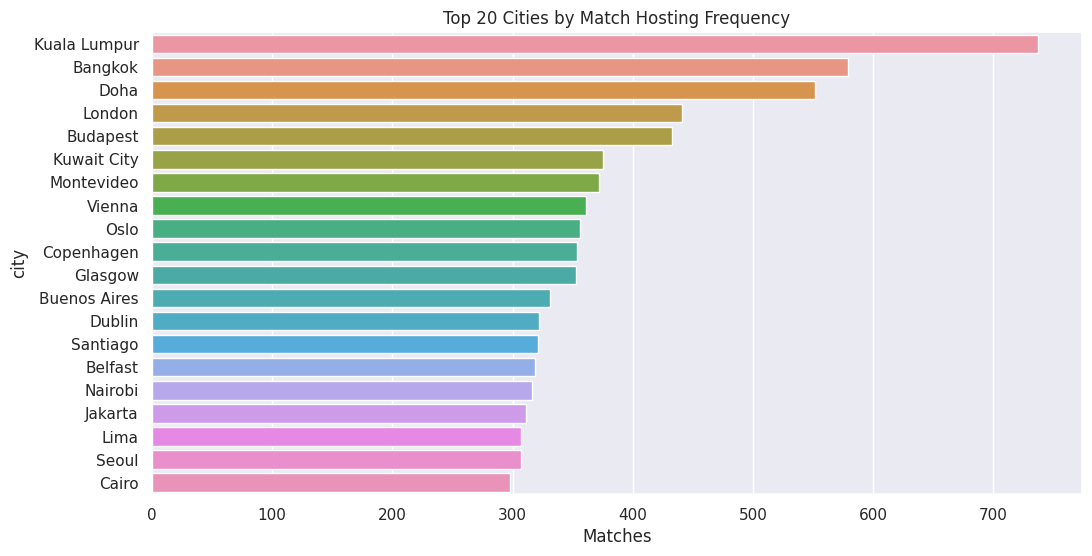

In [ ]:
top_cities = df["city"].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 20 Cities by Match Hosting Frequency")
plt.xlabel("Matches")
plt.show()


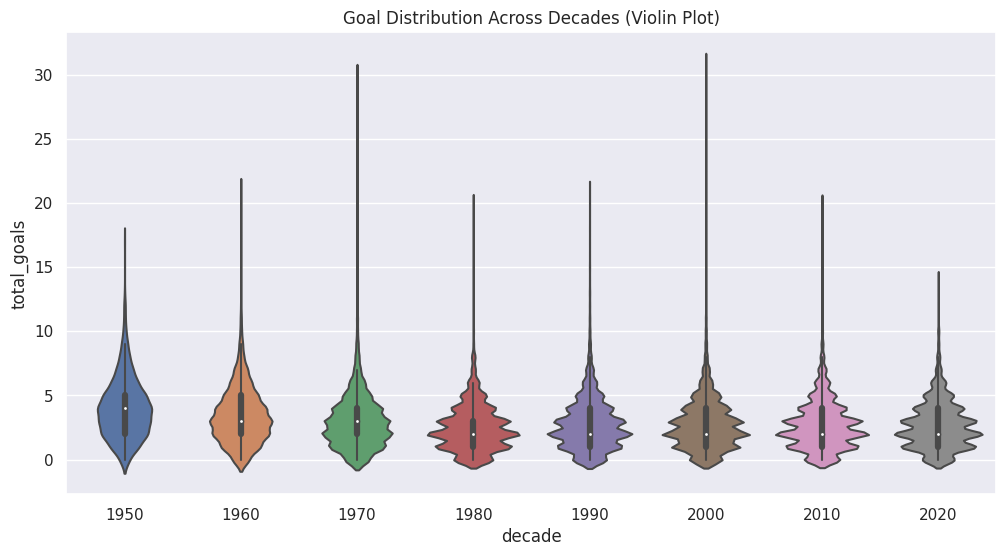

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df["year"]>=1950], x="decade", y="total_goals")
plt.title("Goal Distribution Across Decades (Violin Plot)")
plt.show()






---

# **About Me**

I’m **Arif Miah**, a CSE graduate and AI/ML enthusiast. I specialize in **Machine Learning, Deep Learning, NLP, and Computer Vision**, and I’m proficient in **Python frameworks** like **Keras, scikit-learn, TensorFlow, PyTorch, and OpenCV**.

I build **real-world applications** using **Streamlit** and **Flask**, and I’m a **3× Kaggle Expert** with a strong focus on practical AI solutions and research-driven projects.

---


  



  
### 🔗 Social & Contact

🧑‍💻 GitHub: https://github.com/Arif-miad  
🏆 Kaggle: https://www.kaggle.com/miadul  
💼 LinkedIn: https://www.linkedin.com/in/arif-miah-8751bb217/  
📱 WhatsApp: 01703468954  
✉️ Email: arifmiahcse@gmail.com  
▶️ YouTube: https://www.youtube.com/@intelliaiworld
